In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[ 1.95260417e+00],
         [ 6.91089690e-01],
         [ 8.19704711e-01],
         ...,
         [ 8.79718736e-02],
         [-6.54803962e-02],
         [-1.90029263e-01]],

        [[-1.49610925e+00],
         [-5.29246926e-01],
         [ 6.93332255e-01],
         ...,
         [-1.28129518e+00],
         [ 5.51843822e-01],
         [-1.17738163e+00]],

        [[ 7.98800588e-01],
         [-2.00107598e+00],
         [ 1.05969000e+00],
         ...,
         [-1.34651399e+00],
         [ 8.54411066e-01],
         [-1.07765436e-01]],

        ...,

        [[ 7.38153934e-01],
         [-5.65737784e-01],
         [-2.09240437e+00],
         ...,
         [ 1.21068668e+00],
         [-1.67557323e+00],
         [ 2.41962790e+00]],

        [[-5.82031727e-01],
         [-2.15203270e-01],
         [-2.49563064e-02],
         ...,
         [ 1.57777190e+00],
         [-3.87608796e-01],
         [-6.44474030e-01]],

      

In [6]:
noise_factor = 0.2
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [7]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

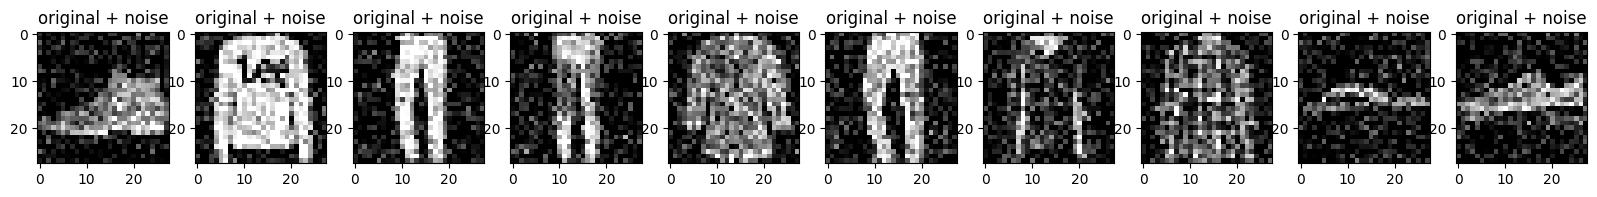

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [9]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [10]:
autoencoder = Denoise()

In [11]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [20]:
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 38ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 40ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 43ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 12

In [21]:
autoencoder.encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
autoencoder.decoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

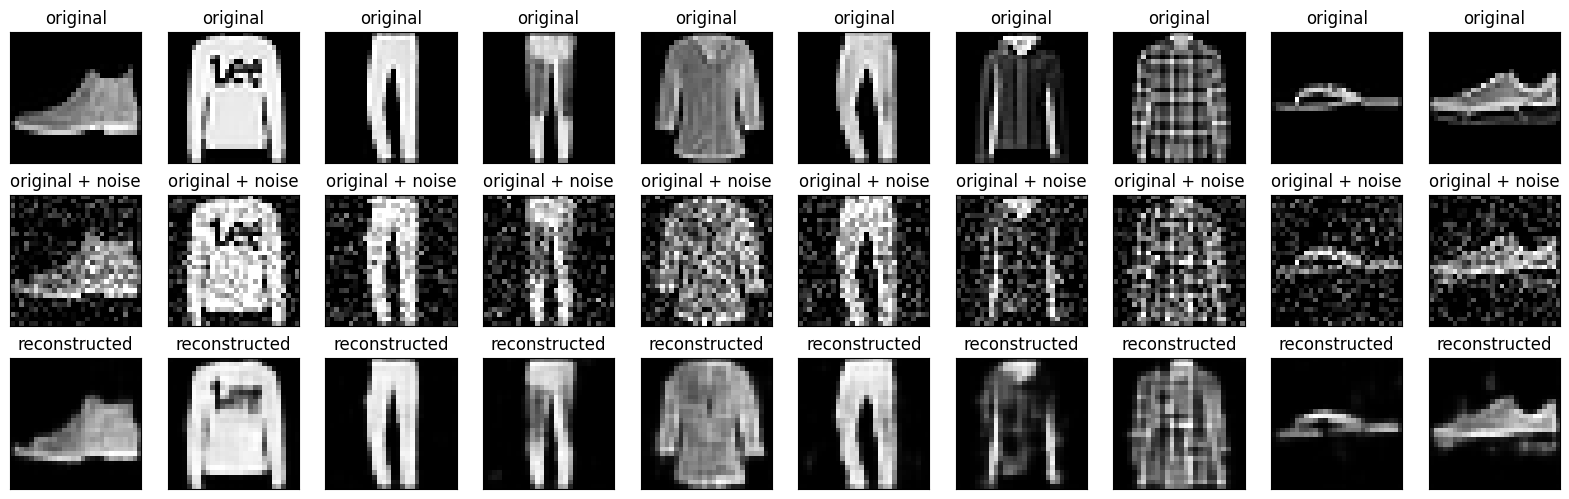

In [24]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

•	Write the code implementation to calculate the loss (Mean Squared Error) for the test dataset.

In [25]:
# Calculate Mean Squared Error for the test dataset
from sklearn.metrics import mean_squared_error
import numpy as np

# Get reconstructed images for the test dataset
decoded_imgs = autoencoder.predict(x_test)

# Flatten both test images and reconstructed images
x_test_flat = x_test.reshape(len(x_test), -1)
decoded_imgs_flat = decoded_imgs.reshape(len(decoded_imgs), -1)

# Calculate the mean squared error for each image and compute the average MSE
mse = np.mean([mean_squared_error(x_test_flat[i], decoded_imgs_flat[i]) for i in range(len(x_test))])
print(f'Mean Squared Error (MSE) for the test dataset: {mse}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Mean Squared Error (MSE) for the test dataset: 0.004401277285069227


•	Write the code implementation to plot the train and validation loss against number of epochs.

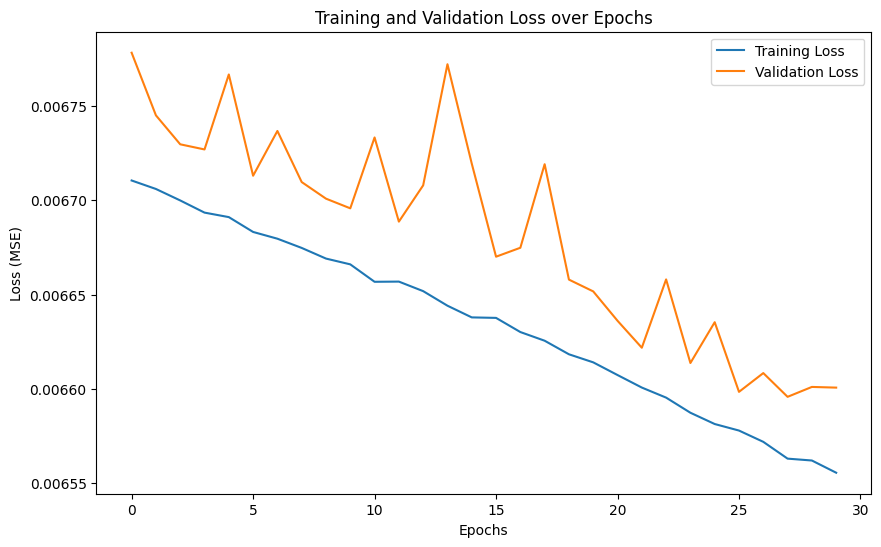

In [26]:
import matplotlib.pyplot as plt

# Extract the loss and validation loss from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the train and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


•	Experiment with “noise_factor” value and use the best value you find in the final implementation

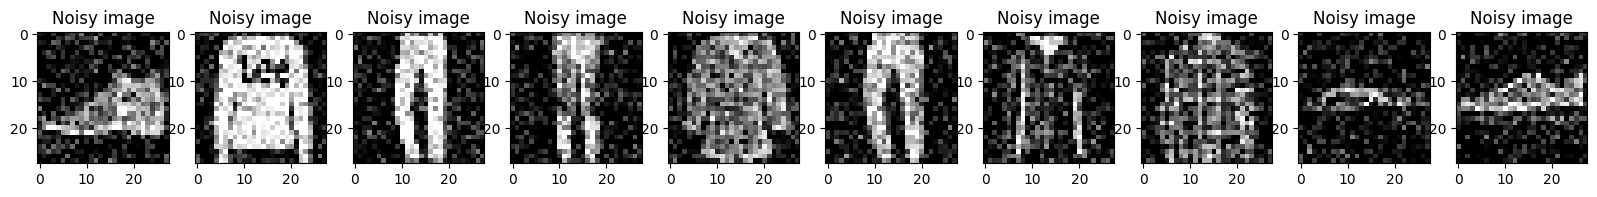

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 35ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 12

In [27]:
# Add noise to the images
noise_factor = 0.2  # You can experiment with different values
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the images to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Display some noisy images
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.title("Noisy image")
    plt.gray()
plt.show()

# Re-train the autoencoder with noisy images as input and original images as target
autoencoder.fit(x_train_noisy, x_train, epochs=30, validation_data=(x_test_noisy, x_test))
